# Car insurance data

**Content**

The columns are resembling practical world features.
The outcome column indicates 1 if a customer has claimed his/her loan else 0.
The data has 19 features from there 18 of them are corresponding logs which were taken by the company.


## 0. Initial analysis of the data
### 0.1 Analysis of null or not valid values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/sagnik1511/car-insurance-data?select=Car_Insurance_Claim.csv
coches=pd.read_csv('Car_Insurance_Claim.csv')
coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

<div class="alert alert-block alert-info">
    Null values were only found in columns 7 <b>(CREDIT_SCORE)</b> and 13 <b>(ANUAL_MILEAGE)</b>, but the other coulumns will be analyzed to search for other invalid values
</div>

### 0.2 Analysis of duplicated values
The only relevant column that could have duplicated values is the ID one, since there can only be one row per client

In [2]:
coches["ID"].nunique()

10000

<div class="alert alert-block alert-info">
    All values in the ID column are unique
</div>

### 0.3 Analysis of data types
Some columns will need a codification to work with them, first we check the 20 first values to try to identify patterns in data.

In [3]:
coches.head(20)

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0   569520    65+  female  majority               0-9y  high school   
1   750365  16-25    male  majority               0-9y         none   
2   199901  16-25  female  majority               0-9y  high school   
3   478866  16-25    male  majority               0-9y   university   
4   731664  26-39    male  majority             10-19y         none   
5   877557  40-64  female  majority             20-29y  high school   
6   930134    65+    male  majority               30y+  high school   
7   461006  26-39  female  majority               0-9y   university   
8    68366  40-64  female  majority             20-29y   university   
9   445911  40-64  female  majority               0-9y  high school   
10  275820    65+    male  majority               30y+  high school   
11  521399    65+  female  majority               30y+  high school   
12  429728  40-64    male  majority             20-29y  high school   
13  569640  16-25  female  majority               0-9y   university   
14  980181  26-39    male  majority             10-19y  high school   
15  906223  26-39  female  majority               0-9y  high school   
16  517747    65+    male  majority               30y+   university   
17   24851  16-25    male  majority               0-9y         none   
18  104086  26-39  female  majority               0-9y   university   
19  240658  16-25  female  majority               0-9y  high school   

           INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0     upper class      0.629027                1.0   after 2015      0.0   
1         poverty      0.357757                0.0  before 2015      0.0   
2   working class      0.493146                1.0  before 2015      0.0   
3   working class      0.206013                1.0  before 2015      0.0   
4   working class      0.388366                1.0  before 2015      0.0   
5     upper class      0.619127                1.0   after 2015      0.0   
6     upper class      0.492944                0.0   after 2015      1.0   
7   working class      0.468689                0.0   after 2015      0.0   
8   working class      0.521815                0.0  before 2015      1.0   
9     upper class      0.561531                1.0  before 2015      0.0   
10    upper class      0.620361                1.0   after 2015      1.0   
11    upper class      0.729831                1.0   after 2015      1.0   
12    upper class      0.637045                1.0  before 2015      1.0   
13    upper class      0.591260                1.0  before 2015      0.0   
14   middle class      0.461568                1.0  before 2015      1.0   
15    upper class      0.762798                0.0   after 2015      1.0   
16    upper class      0.796175                1.0  before 2015      1.0   
17        poverty           NaN                0.0  before 2015      1.0   
18    upper class      0.680594                1.0  before 2015      0.0   
19  working class      0.417714                1.0  before 2015      0.0   

    CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0        1.0        10238         12000.0        sedan                    0   
1        0.0        10238         16000.0        sedan                    0   
2        0.0        10238         11000.0        sedan                    0   
3        1.0        32765         11000.0        sedan                    0   
4        0.0        32765         12000.0        sedan                    2   
5        1.0        10238         13000.0        sedan                    3   
6        1.0        10238         13000.0        sedan                    7   
7        1.0        10238         14000.0        sedan                    0   
8        0.0        10238         13000.0        sedan                    0   
9        1.0        32765         11000.0        sedan                    0   
10       1.0        10238         10000.0        s

<div class="alert alert-block alert-info">
    <h3>First observations</h3>
    - The column AGE shoud be a numeric discrete value, but actually is a object, because it is defining a period of time.<br>
    - The GENDER could be simplified to true - false.<br>
    - The RACE can be simplifoed to a numeric value.<br>
    - DRIVING_EXPERIENCE have the same problem as AGE.<br>
    - EDUCATION and INCOME can be codified like categorical data.<br>
    - VEHICLE_YEAR looks like have only befor/after 2015.<br>
    - POSTAL_CODE is categorical data and can be codified.<br>
</div>

### 0.4  Observations on a *pairplot*
A pairplot is extremely usefull to notice the most obvious caracteristics of the data

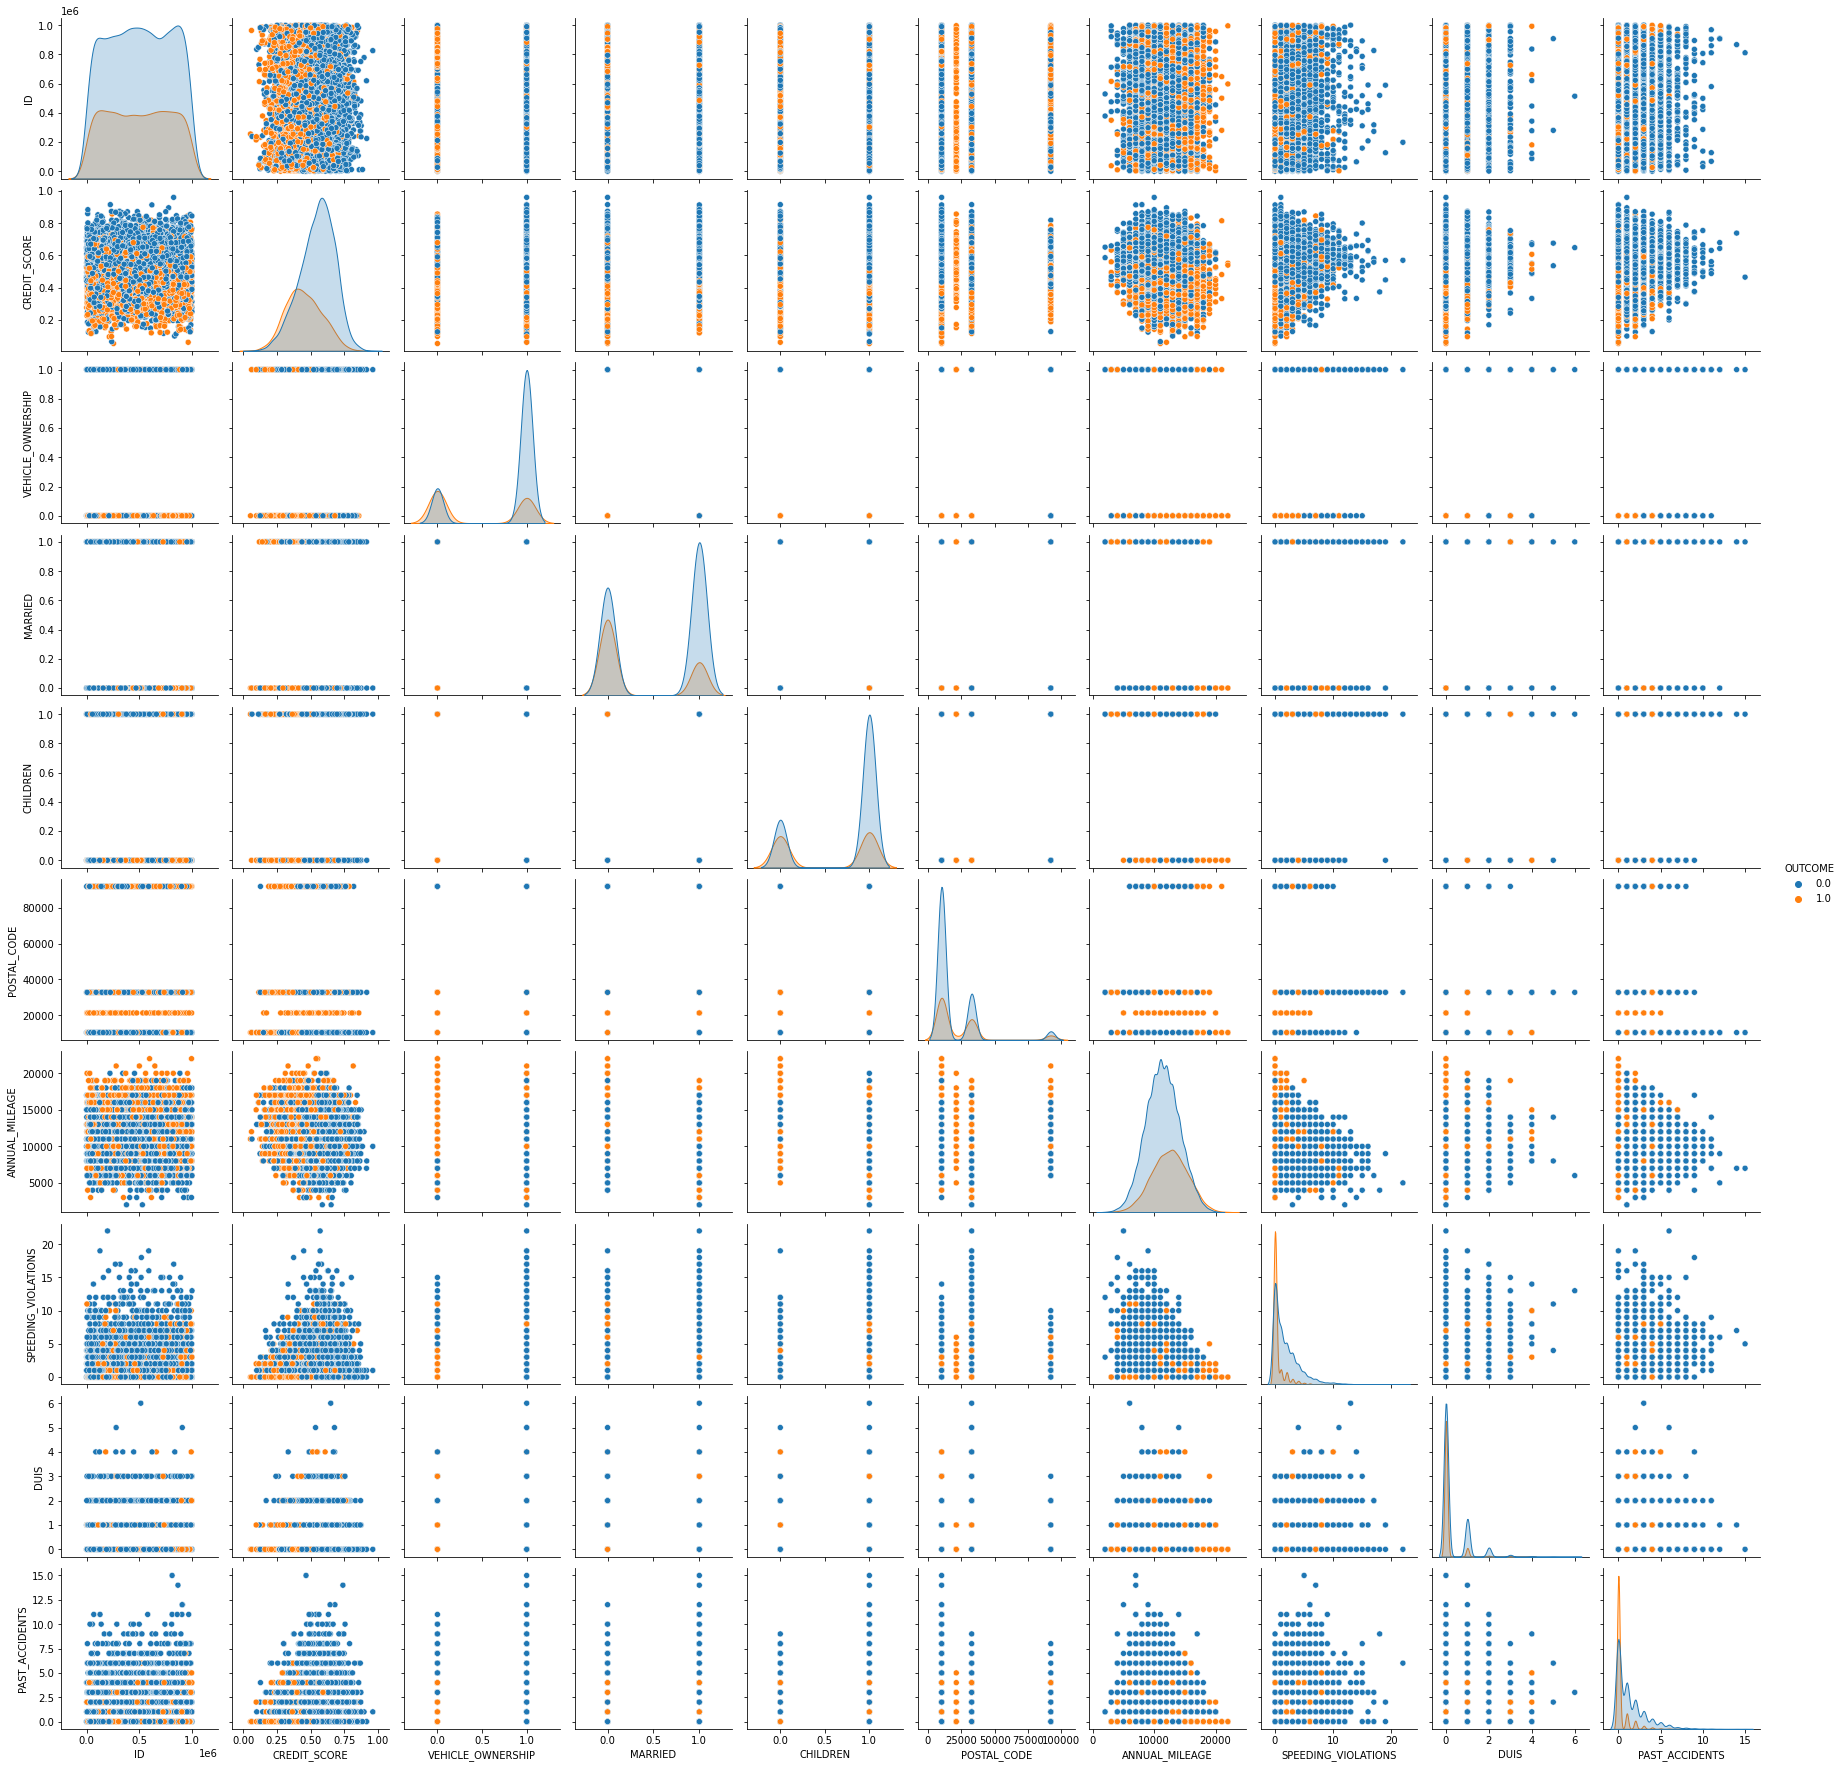

In [4]:
sns.pairplot(data=coches,hue="OUTCOME")

<div class="alert alert-block alert-info">
    <h3>Conclusions of the pairplot</h3>
    - Most of the categorical data has been detected as numerical due a bad declaration, this must be fixed.
    - Some numerical columns dor appear (AGE or  DRIVING_EXPERIENCE) because bad declaration.
</div>

## 1. Data cleaning and orgianzation
Every freature will be analize to ensure data consistency.
### 1.1 AGE encoding
1. We discover the number or classes of the age ranges.
2. Age ranges are encoded into categorical-ordinal data.

In [5]:
coches["AGE"].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

<div class="alert alert-block alert-info">
4 age ranges were found, which means we are going to create 4 categorical classes to organize the data.
</div>

In [6]:
# From now the modified dataframe will be cdf, so we can make comparations between the cleand dataset and the raw one
cdf = coches

cdf['AGE'] = pd.Categorical(
    cdf['AGE'],
    categories=['16-25','26-39','40-64','65+'],
    ordered=True
)

cdf.head(10)

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   
5  877557  40-64  female  majority             20-29y  high school   
6  930134    65+    male  majority               30y+  high school   
7  461006  26-39  female  majority               0-9y   university   
8   68366  40-64  female  majority             20-29y   university   
9  445911  40-64  female  majority               0-9y  high school   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   
5    upper class      0.619127                1.0   after 2015      0.0   
6    upper class      0.492944                0.0   after 2015      1.0   
7  working class      0.468689                0.0   after 2015      0.0   
8  working class      0.521815                0.0  before 2015      1.0   
9    upper class      0.561531                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        sedan                    0   
1       0.0        10238         16000.0        sedan                    0   
2       0.0        10238         11000.0        sedan                    0   
3       1.0        32765         11000.0        sedan                    0   
4       0.0        32765         12000.0        sedan                    2   
5       1.0        10238         13000.0        sedan                    3   
6       1.0        10238         13000.0        sedan                    7   
7       1.0        10238         14000.0        sedan                    0   
8       0.0        10238         13000.0        sedan                    0   
9       1.0        32765         11000.0        sedan                    0   

   DUIS  PAST_ACCIDENTS  OUTCOME  
0     0               0      0.0  
1     0               0      1.0  
2     0               0      0.0  
3     0               0      0.0  
4     0               1      1.0  
5     0               3      0.0  
6     0               3      0.0  
7     0               0      1.0  
8     0               0      0.0  
9     0               0      1.0

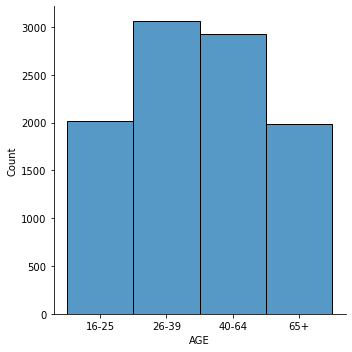

In [7]:
sns.displot(cdf['AGE'])

In [8]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  object  
 3   RACE                 10000 non-null  object  
 4   DRIVING_EXPERIENCE   10000 non-null  object  
 5   EDUCATION            10000 non-null  object  
 6   INCOME               10000 non-null  object  
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  object  
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  object  
 15  SPEEDING_VIOLATIONS 

<div class="alert alert-block alert-info">
Once clasified as categorical/ordinal we can see the distribution ordered by age range, and now Pandas "knows" AGE is a category, not a object.
</div>

### 1.2 GENDER encoding
To save space GENDER will be converted into m/f values.

In [9]:
coches["GENDER"].unique()

array(['female', 'male'], dtype=object)

<div class="alert alert-block alert-info">
We confirm there are only 2 vaues.
</div>

In [10]:
cdf["GENDER"]=cdf["GENDER"].replace({'female':'f','male':'m'})

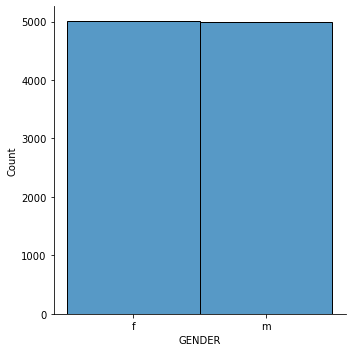

In [11]:
sns.displot(cdf["GENDER"])

In [12]:
cdf.head(10)

ID    AGE GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+      f  majority               0-9y  high school   
1  750365  16-25      m  majority               0-9y         none   
2  199901  16-25      f  majority               0-9y  high school   
3  478866  16-25      m  majority               0-9y   university   
4  731664  26-39      m  majority             10-19y         none   
5  877557  40-64      f  majority             20-29y  high school   
6  930134    65+      m  majority               30y+  high school   
7  461006  26-39      f  majority               0-9y   university   
8   68366  40-64      f  majority             20-29y   university   
9  445911  40-64      f  majority               0-9y  high school   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   
5    upper class      0.619127                1.0   after 2015      0.0   
6    upper class      0.492944                0.0   after 2015      1.0   
7  working class      0.468689                0.0   after 2015      0.0   
8  working class      0.521815                0.0  before 2015      1.0   
9    upper class      0.561531                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        sedan                    0   
1       0.0        10238         16000.0        sedan                    0   
2       0.0        10238         11000.0        sedan                    0   
3       1.0        32765         11000.0        sedan                    0   
4       0.0        32765         12000.0        sedan                    2   
5       1.0        10238         13000.0        sedan                    3   
6       1.0        10238         13000.0        sedan                    7   
7       1.0        10238         14000.0        sedan                    0   
8       0.0        10238         13000.0        sedan                    0   
9       1.0        32765         11000.0        sedan                    0   

   DUIS  PAST_ACCIDENTS  OUTCOME  
0     0               0      0.0  
1     0               0      1.0  
2     0               0      0.0  
3     0               0      0.0  
4     0               1      1.0  
5     0               3      0.0  
6     0               3      0.0  
7     0               0      1.0  
8     0               0      0.0  
9     0               0      1.0

### 1.3 RACE encoding
Similar transformation as GENDER

In [13]:
coches["RACE"].unique()

array(['majority', 'minority'], dtype=object)

<div class="alert alert-block alert-info">
We discovered that there are only 2 values, which do not give any information from the label, but since the author of the dataset is from West Bengal, India, we have some extra information.
</div>

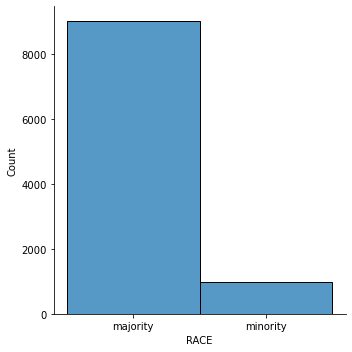

In [14]:
sns.displot(cdf['RACE'])

### 1.4 DRIVING_EXPERIENCE encodign
Similar transformation as AGE

In [15]:
coches["DRIVING_EXPERIENCE"].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [16]:
cdf["DRIVING_EXPERIENCE"] = pd.Categorical(
    cdf["DRIVING_EXPERIENCE"],
    categories=['0-9y','10-19y','20-29y','30y+'],
    ordered=True
)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  object  
 3   RACE                 10000 non-null  object  
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  object  
 6   INCOME               10000 non-null  object  
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  object  
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  object  
 15  SPEEDING_VIOLATIONS 

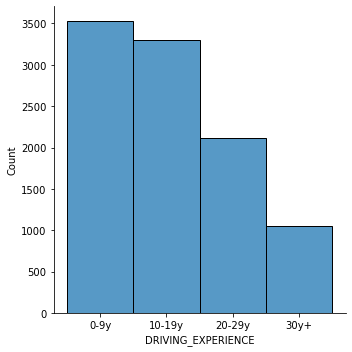

In [17]:
sns.displot(cdf["DRIVING_EXPERIENCE"])

### 1.5 EDUCATION
We are going to order the education depending on the level.

In [18]:
coches["EDUCATION"].unique()

array(['high school', 'none', 'university'], dtype=object)

In [19]:
cdf["EDUCATION"]=cdf["EDUCATION"].replace({'none':'n','high school':'h','university':'u'})

cdf["EDUCATION"] = pd.Categorical(
    cdf["EDUCATION"],
    categories=['n','h','u'],
    ordered=True
)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  object  
 3   RACE                 10000 non-null  object  
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  object  
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  object  
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  object  
 15  SPEEDING_VIOLATIONS 

In [20]:
cdf.head(10)

ID    AGE GENDER      RACE DRIVING_EXPERIENCE EDUCATION         INCOME  \
0  569520    65+      f  majority               0-9y         h    upper class   
1  750365  16-25      m  majority               0-9y         n        poverty   
2  199901  16-25      f  majority               0-9y         h  working class   
3  478866  16-25      m  majority               0-9y         u  working class   
4  731664  26-39      m  majority             10-19y         n  working class   
5  877557  40-64      f  majority             20-29y         h    upper class   
6  930134    65+      m  majority               30y+         h    upper class   
7  461006  26-39      f  majority               0-9y         u  working class   
8   68366  40-64      f  majority             20-29y         u  working class   
9  445911  40-64      f  majority               0-9y         h    upper class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.629027                1.0   after 2015      0.0       1.0   
1      0.357757                0.0  before 2015      0.0       0.0   
2      0.493146                1.0  before 2015      0.0       0.0   
3      0.206013                1.0  before 2015      0.0       1.0   
4      0.388366                1.0  before 2015      0.0       0.0   
5      0.619127                1.0   after 2015      0.0       1.0   
6      0.492944                0.0   after 2015      1.0       1.0   
7      0.468689                0.0   after 2015      0.0       1.0   
8      0.521815                0.0  before 2015      1.0       0.0   
9      0.561531                1.0  before 2015      0.0       1.0   

   POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  \
0        10238         12000.0        sedan                    0     0   
1        10238         16000.0        sedan                    0     0   
2        10238         11000.0        sedan                    0     0   
3        32765         11000.0        sedan                    0     0   
4        32765         12000.0        sedan                    2     0   
5        10238         13000.0        sedan                    3     0   
6        10238         13000.0        sedan                    7     0   
7        10238         14000.0        sedan                    0     0   
8        10238         13000.0        sedan                    0     0   
9        32765         11000.0        sedan                    0     0   

   PAST_ACCIDENTS  OUTCOME  
0               0      0.0  
1               0      1.0  
2               0      0.0  
3               0      0.0  
4               1      1.0  
5               3      0.0  
6               3      0.0  
7               0      1.0  
8               0      0.0  
9               0      1.0

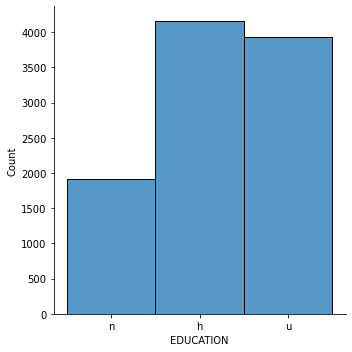

In [21]:
sns.displot(cdf["EDUCATION"])

### 1.6 INCOME encoding
This freature is specially problematic, is a subjetive view of the income (we can not know the real value) so the author of the survey creates 4 categories: upper, working, middle and poverty.
The categories will be changed to poverty (p), lower (l), medium (m) and upper (u) as ordinal/categorical data.


In [22]:
coches["INCOME"].unique()

array(['upper class', 'poverty', 'working class', 'middle class'],
      dtype=object)

In [23]:
cdf["INCOME"]=cdf["INCOME"].replace({'poverty':'p','working class':'l','middle class':'m','upper class':'u'})

cdf["INCOME"] = pd.Categorical(
    cdf["INCOME"],
    categories=['p','l','m','u'],
    ordered=True
)
cdf.head(10)

ID    AGE GENDER      RACE DRIVING_EXPERIENCE EDUCATION INCOME  \
0  569520    65+      f  majority               0-9y         h      u   
1  750365  16-25      m  majority               0-9y         n      p   
2  199901  16-25      f  majority               0-9y         h      l   
3  478866  16-25      m  majority               0-9y         u      l   
4  731664  26-39      m  majority             10-19y         n      l   
5  877557  40-64      f  majority             20-29y         h      u   
6  930134    65+      m  majority               30y+         h      u   
7  461006  26-39      f  majority               0-9y         u      l   
8   68366  40-64      f  majority             20-29y         u      l   
9  445911  40-64      f  majority               0-9y         h      u   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.629027                1.0   after 2015      0.0       1.0   
1      0.357757                0.0  before 2015      0.0       0.0   
2      0.493146                1.0  before 2015      0.0       0.0   
3      0.206013                1.0  before 2015      0.0       1.0   
4      0.388366                1.0  before 2015      0.0       0.0   
5      0.619127                1.0   after 2015      0.0       1.0   
6      0.492944                0.0   after 2015      1.0       1.0   
7      0.468689                0.0   after 2015      0.0       1.0   
8      0.521815                0.0  before 2015      1.0       0.0   
9      0.561531                1.0  before 2015      0.0       1.0   

   POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  \
0        10238         12000.0        sedan                    0     0   
1        10238         16000.0        sedan                    0     0   
2        10238         11000.0        sedan                    0     0   
3        32765         11000.0        sedan                    0     0   
4        32765         12000.0        sedan                    2     0   
5        10238         13000.0        sedan                    3     0   
6        10238         13000.0        sedan                    7     0   
7        10238         14000.0        sedan                    0     0   
8        10238         13000.0        sedan                    0     0   
9        32765         11000.0        sedan                    0     0   

   PAST_ACCIDENTS  OUTCOME  
0               0      0.0  
1               0      1.0  
2               0      0.0  
3               0      0.0  
4               1      1.0  
5               3      0.0  
6               3      0.0  
7               0      1.0  
8               0      0.0  
9               0      1.0

In [24]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  object  
 3   RACE                 10000 non-null  object  
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  object  
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  object  
 15  SPEEDING_VIOLATIONS 

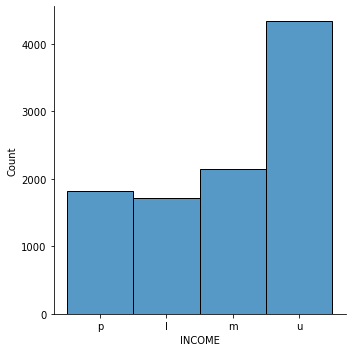

In [25]:
sns.displot(cdf["INCOME"])

### 1.7 VEHICLE_OWNERSHIP
We just have to turn the values into boolean values instead of numerical.

In [26]:
cdf["VEHICLE_OWNERSHIP"] = cdf["VEHICLE_OWNERSHIP"].astype('bool')

In [27]:
cdf["VEHICLE_OWNERSHIP"]

0        True
1       False
2        True
3        True
4        True
        ...  
9995     True
9996     True
9997     True
9998    False
9999     True
Name: VEHICLE_OWNERSHIP, Length: 10000, dtype: bool

In [28]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  object  
 3   RACE                 10000 non-null  object  
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  bool    
 9   VEHICLE_YEAR         10000 non-null  object  
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  object  
 15  SPEEDING_VIOLATIONS 

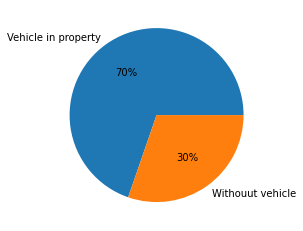

In [29]:
valores = cdf["VEHICLE_OWNERSHIP"].value_counts()
plt.pie(valores,labels=["Vehicle in property","Withouut vehicle"],autopct='%.0f%%')
plt.show()

### 1.8 VEHICLE_YEAR
The data is unnecesary log, cars are clasified before and after 2015, so data will change to b/a.

In [30]:
 cdf["VEHICLE_YEAR"].unique()

array(['after 2015', 'before 2015'], dtype=object)

In [31]:
cdf["VEHICLE_YEAR"]=cdf["VEHICLE_YEAR"].replace({'after 2015':'a','before 2015':'b'})

cdf["VEHICLE_YEAR"] = pd.Categorical(
    cdf["VEHICLE_YEAR"],
    categories=['b','a'],
    ordered=True
)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  object  
 3   RACE                 10000 non-null  object  
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  bool    
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  object  
 15  SPEEDING_VIOLATIONS 

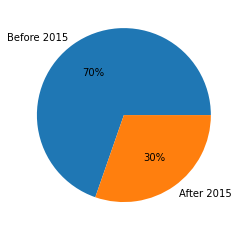

In [32]:
valores = cdf["VEHICLE_YEAR"].value_counts()
plt.pie(valores,labels=["Before 2015","After 2015"],autopct='%.0f%%')
plt.show()

### 1.9 MARRIED
Same procedure as in VEHICLE_OWNERSHIP

In [33]:
cdf["MARRIED"].value_counts()

0.0    5018
1.0    4982
Name: MARRIED, dtype: int64

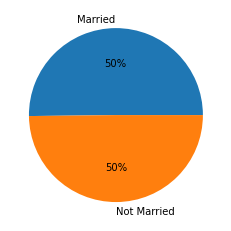

In [34]:
cdf["MARRIED"] = cdf["MARRIED"].astype('bool')
valores = cdf["MARRIED"].value_counts()
plt.pie(valores,labels=["Married","Not Married"],autopct='%.0f%%')
plt.show()

### 1.10 CHILDREN             
Since we only know in the costumer haves children or not, the procedure is the same as in MARRIED.

In [35]:
cdf["CHILDREN"].value_counts()

1.0    6888
0.0    3112
Name: CHILDREN, dtype: int64

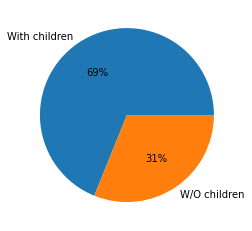

In [36]:
cdf["CHILDREN"] = cdf["CHILDREN"].astype('bool')
valores = cdf["CHILDREN"].value_counts()
plt.pie(valores,labels=["With children","W/O children"],autopct='%.0f%%')
plt.show()

### 1.11 POSTAL_CODE
The postal code is defined as numerical, but is categorical.

In [37]:
cdf["POSTAL_CODE"].value_counts()

10238    6940
32765    2456
92101     484
21217     120
Name: POSTAL_CODE, dtype: int64

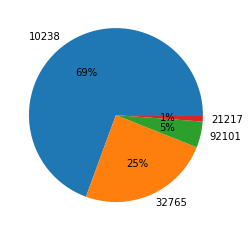

In [38]:
cdf["POSTAL_CODE"] = pd.Categorical(cdf["POSTAL_CODE"])
values = cdf["POSTAL_CODE"].value_counts()
plt.pie(values,labels=cdf["POSTAL_CODE"].unique(),autopct='%.0f%%')
plt.show()

In [39]:
cdf["POSTAL_CODE"]

0       10238
1       10238
2       10238
3       32765
4       32765
        ...  
9995    10238
9996    32765
9997    10238
9998    10238
9999    10238
Name: POSTAL_CODE, Length: 10000, dtype: category
Categories (4, int64): [10238, 21217, 32765, 92101]

### 1.12 ANNUAL_MILEAGE
The first thing we notice is that the mileage follows a Gaussian distribution, which makes sense considering the nature of the data.
We also find some null data we have to clean, inthis case we will use the Mean method.

In [40]:
cdf["ANNUAL_MILEAGE"].unique()

array([12000., 16000., 11000., 13000., 14000., 10000.,  8000.,    nan,
       18000., 17000.,  7000., 15000.,  9000.,  5000.,  6000., 19000.,
        4000.,  3000.,  2000., 20000., 21000., 22000.])

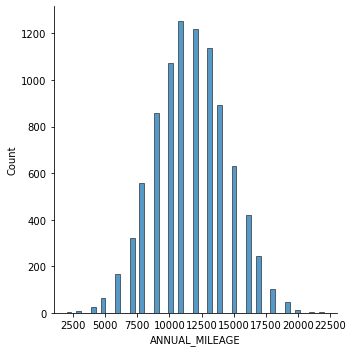

In [41]:
sns.displot(cdf["ANNUAL_MILEAGE"])

In [42]:
cdf["ANNUAL_MILEAGE"].isnull().sum()

957

In [43]:
cdf["ANNUAL_MILEAGE"]=cdf["ANNUAL_MILEAGE"].fillna(cdf["ANNUAL_MILEAGE"].mean())

In [44]:
cdf["ANNUAL_MILEAGE"].isnull().sum()

0

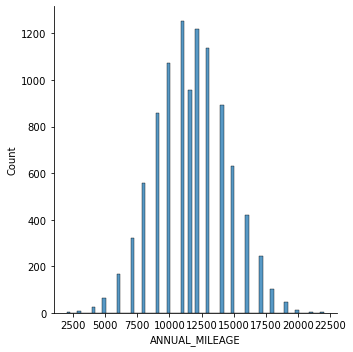

In [45]:
sns.displot(cdf["ANNUAL_MILEAGE"])

<div class="alert alert-block alert-info">
The null values were less than 10% and we can se how they "break" the distribution.
</div>

### 1.13 VEHICLE_TYPE
Another freathure that is categorical, just 2 types.

In [46]:
cdf["VEHICLE_TYPE"].unique()

array(['sedan', 'sports car'], dtype=object)

In [47]:
cdf["VEHICLE_TYPE"]=cdf["VEHICLE_TYPE"].replace({'sedan':'s','sports car':'sc'})

cdf["VEHICLE_TYPE"] = pd.Categorical(
    cdf["VEHICLE_TYPE"]
)

In [48]:
cdf["VEHICLE_TYPE"]

0       s
1       s
2       s
3       s
4       s
       ..
9995    s
9996    s
9997    s
9998    s
9999    s
Name: VEHICLE_TYPE, Length: 10000, dtype: category
Categories (2, object): ['s', 'sc']

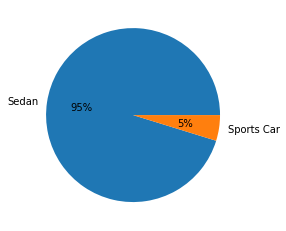

In [49]:
values = cdf["VEHICLE_TYPE"].value_counts()
plt.pie(values,labels=["Sedan","Sports Car"],autopct='%.0f%%')
plt.show()

### 1.14 SPEEDING_VIOLATIONS
Follows a geometric distribution. Do not require any modification.

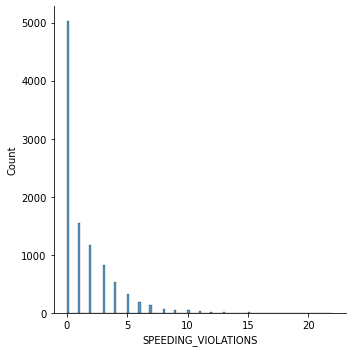

In [50]:
sns.displot(cdf["SPEEDING_VIOLATIONS"])

### 1.15 DUIS
Follows the same pattern as SPEEDING_VIOLATIONS

In [51]:
cdf["DUIS"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: DUIS, Length: 10000, dtype: int64

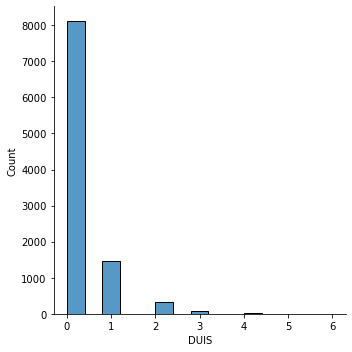

In [52]:
sns.displot(cdf["DUIS"])

### 1.16 PAST_ACCIDENTS

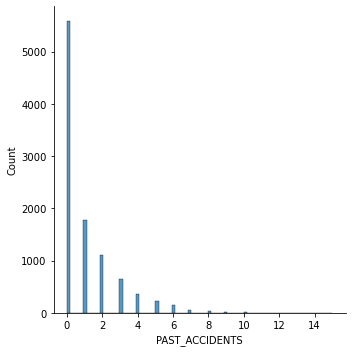

In [53]:
sns.displot(cdf["PAST_ACCIDENTS"])

### 1.17 OUTCOME
This is the **Tag**, says if the client claimed the insurance.
The only task is to change the data type from float64 to int32

In [54]:
cdf["OUTCOME"] = cdf["OUTCOME"].astype("int32")

In [55]:
cdf["OUTCOME"]

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: OUTCOME, Length: 10000, dtype: int32

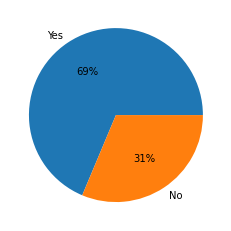

In [56]:
values = cdf["OUTCOME"].value_counts()
plt.pie(values,labels=["Yes","No"],autopct='%.0f%%')
plt.show()

In [57]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  object  
 3   RACE                 10000 non-null  object  
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  bool    
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  bool    
 11  CHILDREN             10000 non-null  bool    
 12  POSTAL_CODE          10000 non-null  category
 13  ANNUAL_MILEAGE       10000 non-null  float64 
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

### 1.18 CREDIT_SCORE cleaning
CREDIT_SCORE contains some null values we will have to treat to have the greatest ammount of precission. After a shor investigation, we conclude that if a person dont have a credit history, they have a credit score of 0, so null values have to be cleaned.

In [58]:
coches["CREDIT_SCORE"].isnull().sum()

982

<div class="alert alert-block alert-info">
We find 982 null values, which are the 9'82% of the values.
</div>

**Solution**

Because the freature is numerical, we can assign a new value for the missing ones, deleting the rows or the freature is discarded.

Imputation metods:

- Random: Discarded for being too imprecise for this case.
- Mean: Simple but effective method in the worst case will not impact the result my a lot.
- Mode: Works better for categorical data.
- Median: Not the best method for continuous data, but we can still use it.
- Model: The most precise solution, but also would cost a lot of time.
- Hot Deck: The value is decided based on similar values of the data.

We are going to use the *Hot Deck - KNN* imputation method, because is the most efficient one

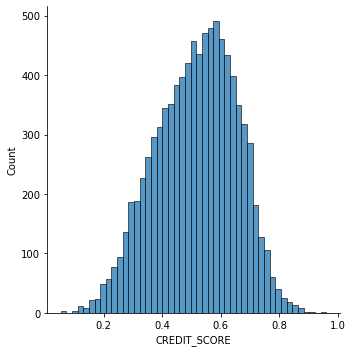

In [59]:
sns.displot(cdf["CREDIT_SCORE"])

In [60]:
coches["CREDIT_SCORE"]

0       0.629027
1       0.357757
2       0.493146
3       0.206013
4       0.388366
          ...   
9995    0.582787
9996    0.522231
9997    0.470940
9998    0.364185
9999    0.435225
Name: CREDIT_SCORE, Length: 10000, dtype: float64

In [61]:
# Encoding of categorical columns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

columnsEncode = ["AGE","GENDER","RACE","DRIVING_EXPERIENCE","EDUCATION","INCOME","VEHICLE_OWNERSHIP","VEHICLE_YEAR","MARRIED","CHILDREN","POSTAL_CODE","VEHICLE_TYPE"]

#Copy to keep categorical values before encoding
cdf_copy = cdf.copy()

label_encoder =LabelEncoder()
for c in columnsEncode:
    cdf[c]=label_encoder.fit_transform(cdf[c])
cdf.head(10)

cdf.to_csv("coches_aprendizaje.csv")

In [62]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
res = imputer.fit_transform(cdf)
res = pd.DataFrame(res)
cdf["CREDIT_SCORE"]=res[7]

In [63]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  int32  
 2   GENDER               10000 non-null  int32  
 3   RACE                 10000 non-null  int32  
 4   DRIVING_EXPERIENCE   10000 non-null  int32  
 5   EDUCATION            10000 non-null  int32  
 6   INCOME               10000 non-null  int32  
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  int32  
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  int32  
 15  SPEEDING_VIOLATIONS  10000 non-null  

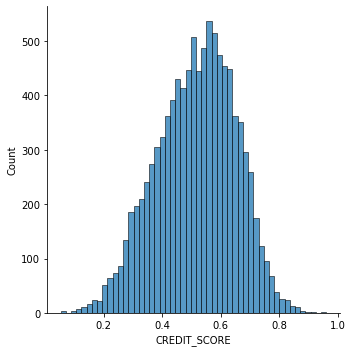

In [64]:
sns.displot(cdf["CREDIT_SCORE"])

In [65]:
cdf

ID  AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  \
0     569520    3       0     0                   0          0       3   
1     750365    0       1     0                   0          1       2   
2     199901    0       0     0                   0          0       0   
3     478866    0       1     0                   0          2       0   
4     731664    1       1     0                   1          1       0   
...      ...  ...     ...   ...                 ...        ...     ...   
9995  323164    1       0     0                   1          2       3   
9996  910346    1       0     0                   1          1       1   
9997  468409    1       1     0                   0          0       1   
9998  903459    1       0     0                   1          0       2   
9999  442696    1       0     0                   0          1       0   

      CREDIT_SCORE  VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  \
0         0.629027                  1             0        0         1   
1         0.357757                  0             1        0         0   
2         0.493146                  1             1        0         0   
3         0.206013                  1             1        0         1   
4         0.388366                  1             1        0         0   
...            ...                ...           ...      ...       ...   
9995      0.582787                  1             1        0         0   
9996      0.522231                  1             0        0         1   
9997      0.470940                  1             1        0         1   
9998      0.364185                  0             1        0         1   
9999      0.435225                  1             1        1         1   

      POSTAL_CODE  ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  \
0               0    12000.000000             0                    0     0   
1               0    16000.000000             0                    0     0   
2               0    11000.000000             0                    0     0   
3               2    11000.000000             0                    0     0   
4               2    12000.000000             0                    2     0   
...           ...             ...           ...                  ...   ...   
9995            0    16000.000000             0                    0     0   
9996            2    11697.003207             0                    1     0   
9997            0    14000.000000             0                    0     0   
9998            0    13000.000000             0                    2     0   
9999            0    13000.000000             0                    0     0   

      PAST_ACCIDENTS  OUTCOME  
0                  0        0  
1                  0        1  
2                  0        0  
3                  0        0  
4                  1        1  
...              ...      ...  
9995               1        0  
9996               0        0  
9997               0        0  
9998               1        1  
9999               0        0  

[10000 rows x 19 columns]

## 2. Visualization of the clean data

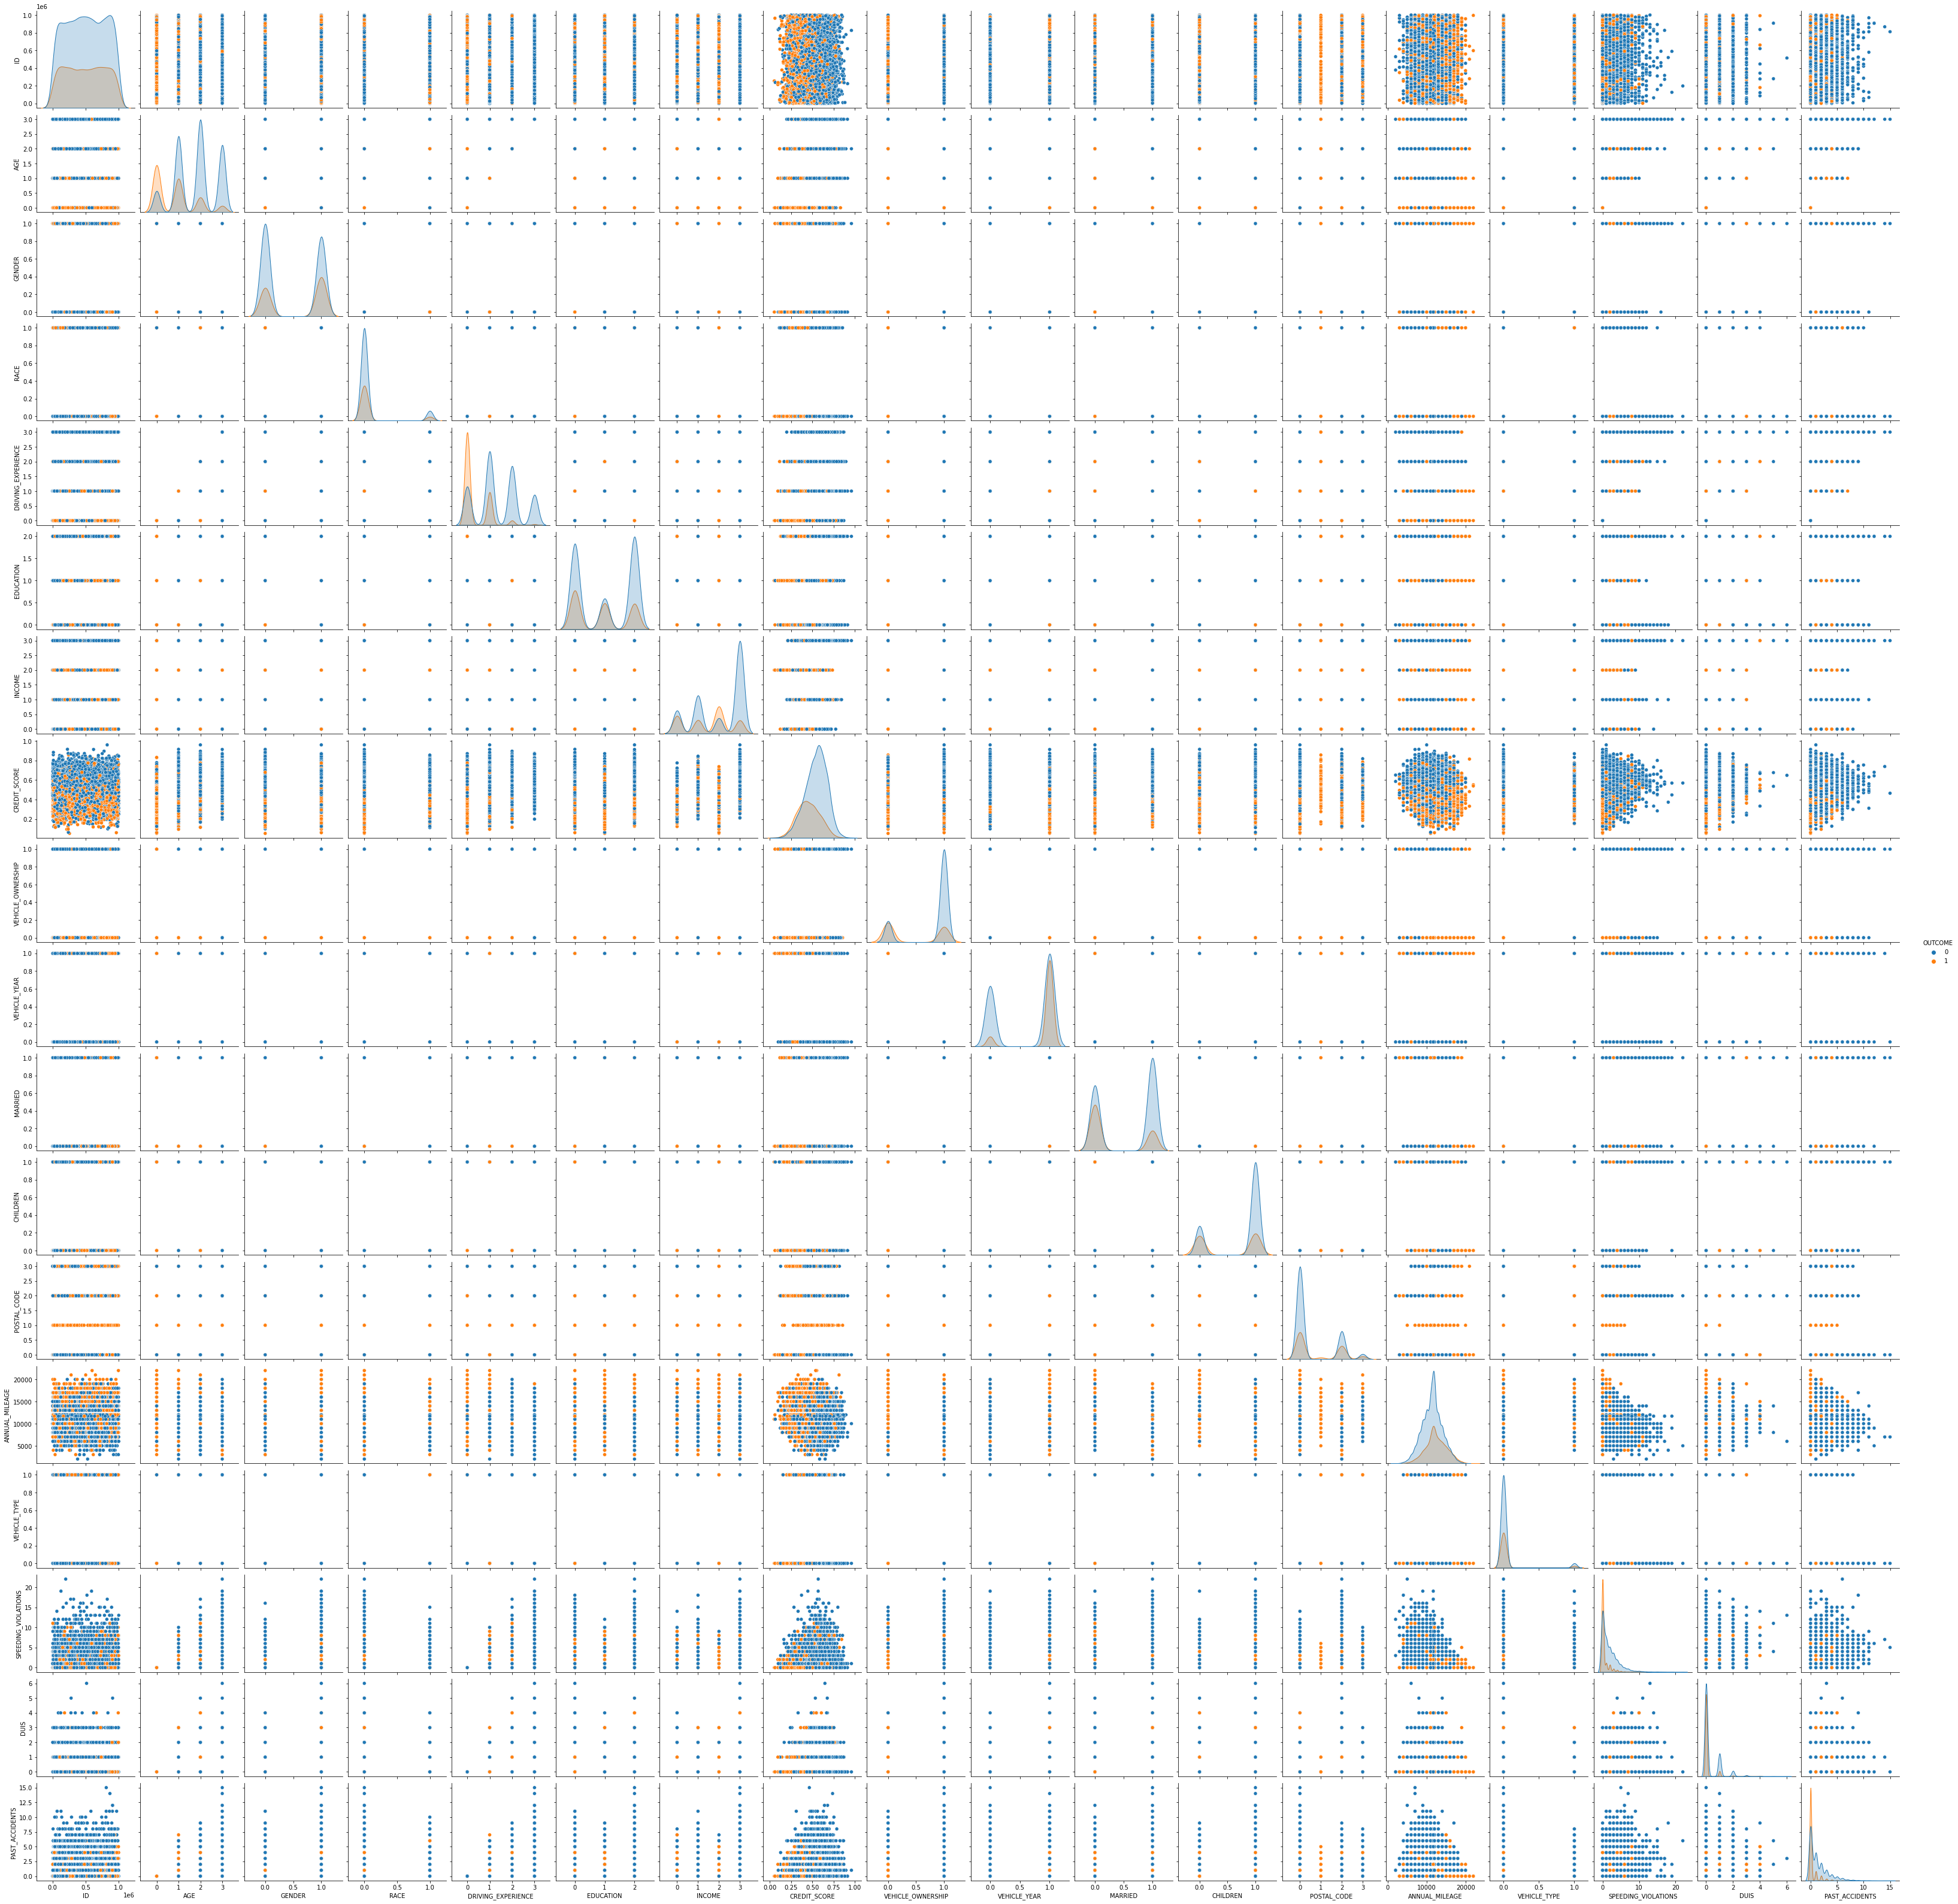

In [66]:
sns.pairplot(data=cdf,hue="OUTCOME")

## 3. Data pipelines


In [67]:
#Dataset for pipelines
cdfPipe = pd.read_csv('Car_Insurance_Claim.csv')
cdfPipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

### 3.1 Pipeline for categorical data
Categorical data sometimes have to be transformed to make it accesible for visualization and encodign.
If the data is ordinal, we have to establish manually a order, like in AGE or DRIVING_EXPERIENCE, once it is done its easy to transform.

### 3.2 Pipeline for missing data
The pipeline for mising data can be automatized with the aplication of a imputation method. 

In [68]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [69]:
# Imputation by MEAN
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
#      ,('scaler', StandardScaler())
])

### 3.3 Pipeline for encoding data

In [70]:
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
#      ,('encoder', OrdinalEncoder())
])

numeric_features = ["CREDIT_SCORE","ANNUAL_MILEAGE","SPEEDING_VIOLATIONS","DUIS"]
categorical_features = ["AGE","GENDER","RACE","DRIVING_EXPERIENCE","EDUCATION","INCOME","VEHICLE_OWNERSHIP","VEHICLE_YEAR","MARRIED","CHILDREN","POSTAL_CODE","VEHICLE_TYPE"]

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

## 4. Data visualization

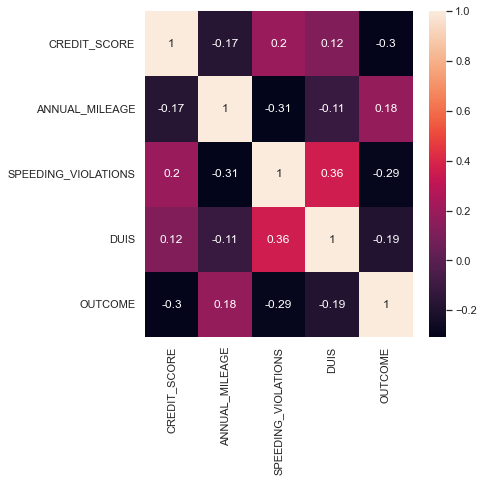

In [71]:
numeric_features.append("OUTCOME")
corrMatrix = cdf[numeric_features].corr()
sns.set(rc = {'figure.figsize':(6,6)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Distribution of the CREDIT_SCORE

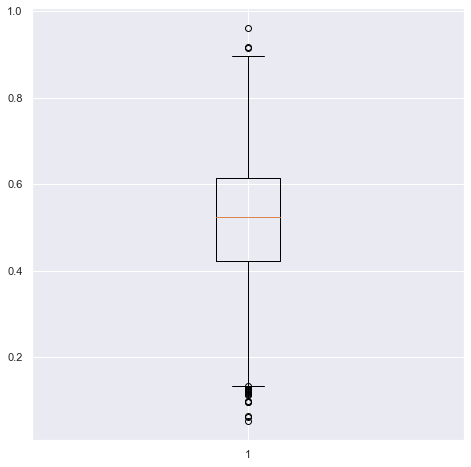

In [72]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot([cdf["CREDIT_SCORE"]])
plt.show()

### Distribution of the ANNUAL_MILEAGE

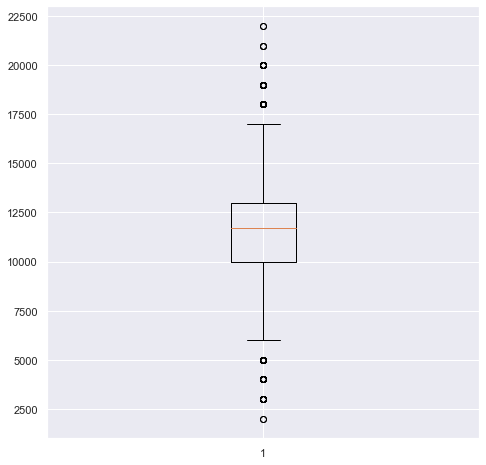

In [73]:

fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot([cdf["ANNUAL_MILEAGE"]])
plt.show()

### Influence by the race and gender in the CREDIT_SCORE

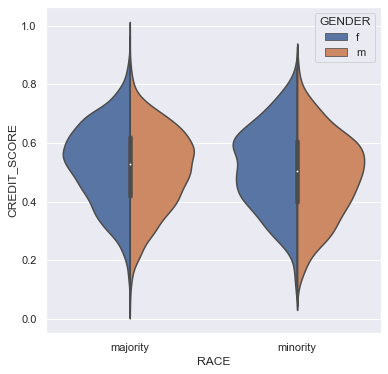

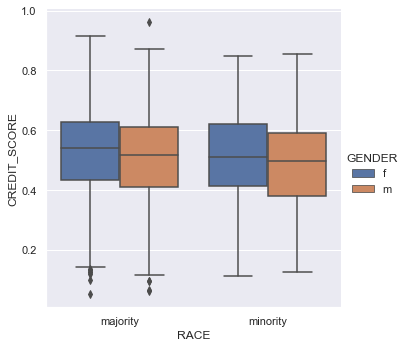

In [74]:

sns.violinplot(data=cdf_copy,
            kind="violin",
            x="RACE",
            y="CREDIT_SCORE",
            hue="GENDER",
            split=True
           )
sns.catplot(data=cdf_copy,
            kind="box",
            x="RACE",
            y="CREDIT_SCORE",
            hue="GENDER"
           )

### Distribution by OUTCOME

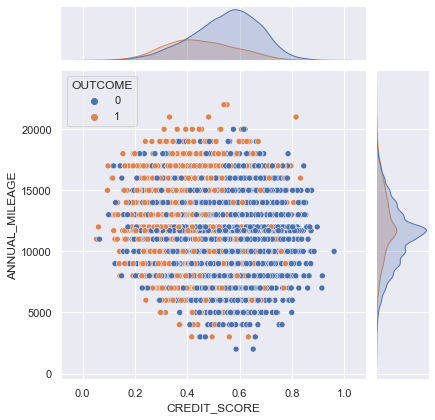

In [75]:
sns.jointplot(data=cdf_copy, x="CREDIT_SCORE", y="ANNUAL_MILEAGE", hue="OUTCOME")

(-1.0, 10.0)

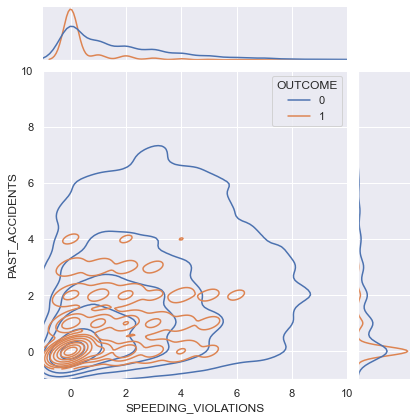

In [76]:
plot = sns.jointplot(data=cdf_copy, x="SPEEDING_VIOLATIONS", y="PAST_ACCIDENTS", hue="OUTCOME",kind="kde")
plot.ax_marg_x.set_xlim(-1, 10)
plot.ax_marg_y.set_ylim(-1, 10)